### Import

Una delle cose migliori di Python (soprattutto se siete scienziati dei dati) è il gran numero di librerie personalizzate di alta qualità che sono state scritte per questo linguaggio.

Alcune di queste librerie fanno parte della "libreria standard", il che significa che si possono trovare ovunque si esegua Python. Altre librerie possono essere facilmente aggiunte, anche se non sono sempre fornite con Python.

In ogni caso, accederemo a questo codice con le importazioni.

Inizieremo il nostro esempio importando matematica dalla libreria standard.

In [1]:
import math

print("It's math! It has type {}".format(type(math)))

It's math! It has type <class 'module'>


**math** è un modulo. Un modulo è solo un insieme di variabili (uno spazio dei nomi, se volete) definito da qualcun altro. Possiamo vedere tutti i nomi in matematica usando la funzione incorporata dir().

In [2]:
print(dir(math))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'lcm', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'nextafter', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc', 'ulp']


Possiamo accedere a queste variabili utilizzando la sintassi dei punti. Alcune di esse si riferiscono a valori semplici, come **math.pi**:

In [3]:
print("pi to 4 significant digits = {:.4}".format(math.pi))

pi to 4 significant digits = 3.142


Ma la maggior parte di ciò che troveremo nel modulo sono funzioni, come **math.log**:

In [4]:
math.log(32, 2)

5.0

In [5]:
help(math.log)

Help on built-in function log in module math:

log(...)
    log(x, [base=math.e])
    Return the logarithm of x to the given base.
    
    If the base not specified, returns the natural logarithm (base e) of x.



In [6]:
help(math)

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
        
        The result is between 0 and pi.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
        
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(x, /)
        Return the inverse hyperbolic tangent of x.
    
    ceil(x, /)
        Return the ceiling of x as an Integral.
      

Se sappiamo che useremo spesso le funzioni di matematica, possiamo importarle con un alias più corto per risparmiare un po' di battitura (anche se in questo caso **math** è già abbastanza corto).

In [7]:
import math as mt
mt.pi

3.141592653589793

Potreste aver visto del codice che fa questo con alcune librerie popolari come Pandas, Numpy, Tensorflow o Matplotlib. Per esempio, è una convenzione comune importare numpy come np e importare pandas come pd.

L'as rinomina semplicemente il modulo importato. È equivalente a fare qualcosa come:

In [8]:
import math
mt = math

Non sarebbe fantastico se potessimo fare riferimento a tutte le variabili del modulo math da sole? Ad esempio, se potessimo fare riferimento a pi greco invece che a math.pi o mt.pi? Buone notizie: possiamo farlo.

import * rende direttamente accessibili tutte le variabili del modulo (senza alcun prefisso punteggiato).

La cattiva notizia è che alcuni puristi potrebbero rimproverarvi per aver fatto questo.

Peggio ancora: non hanno tutti i torti.

In [9]:
from math import *
print(pi, log(32, 2))

3.141592653589793 5.0


Questo tipo di "importazioni a stella" può occasionalmente portare a situazioni strane e difficili da analizzare.

Il problema in questo caso è che i moduli math e numpy hanno entrambi funzioni chiamate log, ma con semantica diversa. Poiché importiamo il secondo modulo da numpy, il suo log sovrascrive (o "ombreggia") la variabile log importata da math.

Un buon compromesso è importare da ciascun modulo solo le cose specifiche di cui avremo bisogno:

In [10]:
from math import log, pi
from numpy import asarray

In [11]:
import numpy
print("numpy.random is a", type(numpy.random))
print("it contains names such as...",
      dir(numpy.random)[-15:]
     )

numpy.random is a <class 'module'>
it contains names such as... ['seed', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'test', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf']


In [12]:
# Roll 10 dice
rolls = numpy.random.randint(low=1, high=6, size=10)
rolls

array([4, 4, 1, 2, 2, 1, 3, 5, 4, 3])

Quando si lavora con varie librerie per compiti specializzati, si scopre che esse definiscono i propri tipi, con i quali si deve imparare a lavorare. Per esempio, se lavorate con la libreria di grafici matplotlib, entrerete in contatto con gli oggetti da essa definiti che rappresentano sottotrame, figure, tickmark e annotazioni. Le funzioni di pandas vi forniranno DataFrames e Series.

In questa sezione, voglio condividere con voi una rapida guida di sopravvivenza per lavorare con tipi strani.

Tre strumenti per capire gli oggetti strani
Nella cella precedente, abbiamo visto che chiamando una funzione numpy abbiamo ottenuto un "array".

1. type()
2. dir()
3. help()

In [13]:
type(rolls)

numpy.ndarray

In [14]:
print(dir(rolls))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

In [15]:
# If I want the average roll, the "mean" method looks promising...
rolls.mean()

2.9

In [16]:
# Or maybe I just want to turn the array into a list, in which case I can use "tolist"
rolls.tolist()

[4, 4, 1, 2, 2, 1, 3, 5, 4, 3]

In [17]:
# That "ravel" attribute sounds interesting. I'm a big classical music fan.
help(rolls.ravel)

Help on built-in function ravel:

ravel(...) method of numpy.ndarray instance
    a.ravel([order])
    
    Return a flattened array.
    
    Refer to `numpy.ravel` for full documentation.
    
    See Also
    --------
    numpy.ravel : equivalent function
    
    ndarray.flat : a flat iterator on the array.



In [18]:
# Okay, just tell me everything there is to know about numpy.ndarray
# (Click the "output" button to see the novel-length output)
help(rolls)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

Si potrebbe pensare che Python imponga un comportamento rigoroso a parti della sua sintassi principale, come +, <, in, ==, o le parentesi quadre per l'indicizzazione e l'affettatura. In realtà, l'approccio è molto libero. Quando si definisce un nuovo tipo, si può scegliere come funziona l'addizione o cosa significa che un oggetto di quel tipo è uguale a qualcos'altro.

I progettisti delle liste hanno deciso che l'aggiunta ai numeri non era consentita. I progettisti degli array numpy hanno scelto una strada diversa (aggiungendo il numero a ogni elemento dell'array).

Ecco alcuni altri esempi di come gli array numpy interagiscono in modo inaspettato con gli operatori Python (o almeno in modo diverso dalle liste).

In [19]:
rolls + 10

array([14, 14, 11, 12, 12, 11, 13, 15, 14, 13])

In [20]:
# At which indices are the dice less than or equal to 3?
rolls <= 3

array([False, False,  True,  True,  True,  True,  True, False, False,
        True])

In [21]:
xlist = [[1,2,3],[2,4,6],]
# Create a 2-dimensional array
x = numpy.asarray(xlist)
print("xlist = {}\nx =\n{}".format(xlist, x))

xlist = [[1, 2, 3], [2, 4, 6]]
x =
[[1 2 3]
 [2 4 6]]


In [22]:
# Get the last element of the second row of our numpy array
x[1,-1]

6

Il tipo ndarray di numpy è specializzato per lavorare con dati multidimensionali, quindi definisce una propria logica per l'indicizzazione, consentendo di indicizzare mediante una tupla per specificare l'indice di ogni dimensione.

Quando 1 + 1 non è uguale a 2?

Le cose possono diventare più strane di così. Forse avrete sentito parlare (o anche usato) tensorflow, una libreria Python molto utilizzata per il deep learning. Fa largo uso del sovraccarico degli operatori.



In [23]:
import tensorflow as tf
# Create two constants, each with value 1
a = tf.constant(1)
b = tf.constant(1)
# Add them together to get...
a + b

<tf.Tensor: shape=(), dtype=int32, numpy=2>

a + b non è 2, è (per citare la documentazione di tensorflow)...

un handle simbolico a uno degli output di un'operazione. Non contiene i valori dell'output dell'operazione, ma fornisce invece un mezzo per calcolare tali valori in una tf.Session di TensorFlow.

È importante essere consapevoli del fatto che questo genere di cose è possibile e che le librerie spesso utilizzano l'overloading degli operatori in modi non ovvi o che sembrano magici.

Capire come funzionano gli operatori di Python quando vengono applicati a ints, stringhe ed elenchi non garantisce che sarete in grado di capire immediatamente cosa fanno quando vengono applicati a un tensorflow Tensor, o a un numpy ndarray, o a un pandas DataFrame.

Una volta che si è avuto un piccolo assaggio dei DataFrame, per esempio, un'espressione come quella che segue inizia a sembrare molto intuitiva:

In [25]:
print(dir(list))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


Ottenere le righe con popolazione superiore a 1m in Sud America
df[(df['popolazione'] > 10**6) & (df['continente'] == 'Sud America')]. **non funziona**

Questo problema è direttamente collegato all'overloading degli operatori.

Quando i programmatori Python vogliono definire il comportamento degli operatori sui loro tipi, lo fanno implementando metodi con nomi speciali che iniziano e finiscono con due trattini bassi, come __lt__, __setattr__ o __contains__. In genere, i nomi che seguono questo formato con doppio trattino basso hanno un significato speciale per Python.

Quindi, per esempio, l'espressione x in [1, 2, 3] richiama in realtà il metodo di lista __contains__ dietro le quinte. È equivalente a (il più brutto) [1, 2, 3].__contains__(x).

Se siete curiosi di saperne di più, potete consultare la documentazione ufficiale di Python, che descrive molti, molti altri di questi metodi speciali "underscore".

In queste lezioni non definiremo i nostri tipi (se solo ci fosse tempo!), ma spero che più avanti possiate sperimentare le gioie di definire i vostri meravigliosi e strani tipi.

## Esercizi

In [26]:
from learntools.core import binder; binder.bind(globals())
from learntools.python.ex7 import *
print('Setup complete.')

Setup complete.


### Domanda 1

Dopo aver completato gli esercizi sulle liste e sulle tuple, Jimmy ha notato che, secondo la funzione estimate_average_slot_payout, le slot machine del casinò Learn Python sono in realtà truccate contro il banco e, nel lungo periodo, sono redditizie.

Partendo con 200 dollari in tasca, Jimmy ha giocato alle slot 500 volte, registrando il suo nuovo saldo in una lista dopo ogni giro. Ha usato la libreria matplotlib di Python per creare un grafico del suo saldo nel tempo:

<AxesSubplot:>

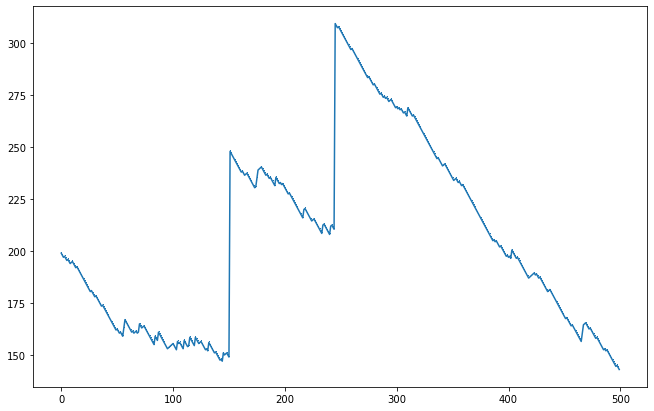

In [27]:
# Import the jimmy_slots submodule
from learntools.python import jimmy_slots
# Call the get_graph() function to get Jimmy's graph
graph = jimmy_slots.get_graph()
graph

Come potete vedere, di recente ha avuto un po' di sfortuna. Vuole twittare questo messaggio insieme ad alcuni emoji di scelta, ma, per come si presenta ora, i suoi follower probabilmente lo troveranno confuso. Vi chiede di aiutarlo ad apportare le seguenti modifiche:

Aggiungere il titolo "Risultati di 500 estrazioni di slot machine".
Fare in modo che l'asse delle ordinate parta da 0.
Aggiungere l'etichetta "Balance" all'asse y.
Dopo aver richiamato type(graph) si nota che il grafico di Jimmy è di tipo matplotlib.axes._subplots.AxesSubplot. Questa è nuova. Chiamando dir(graph), si trovano tre metodi che sembrano utili: .set_title(), .set_ylim() e .set_ylabel().

Utilizziamo questi metodi per completare la funzione prettify_graph secondo le richieste di Jimmy. Abbiamo già eliminato la prima richiesta (impostare un titolo).

z:\users\SYSTEM\AppData\Local\Temp/ipykernel_9440/699596001.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_yticklabels(new_labels)


<AxesSubplot:title={'center':'Results of 500 slot machine pulls'}, ylabel='Balance'>

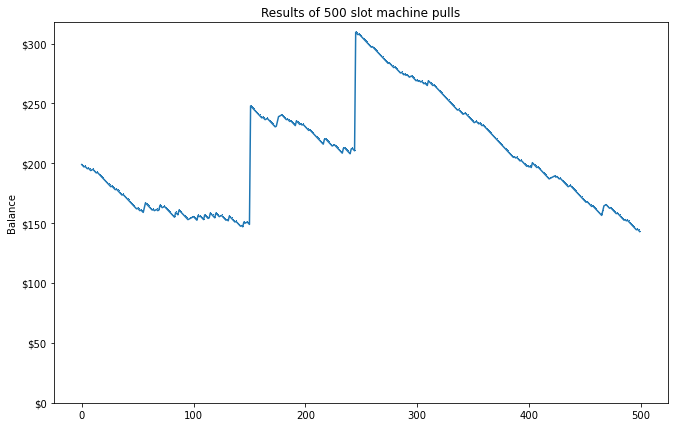

In [28]:
def prettify_graph(graph):
    """Modify the given graph according to Jimmy's requests: add a title, make the y-axis
    start at 0, label the y-axis. (And, if you're feeling ambitious, format the tick marks
    as dollar amounts using the "$" symbol.)
    """
    graph.set_title("Results of 500 slot machine pulls")
    # Complete steps 2 and 3 here
    # Make the y-axis begin at 0
    graph.set_ylim(bottom=0)
    # Label the y-axis
    graph.set_ylabel("Balance")
    # Bonus: format the numbers on the y-axis as dollar amounts
    # An array of the values displayed on the y-axis (150, 175, 200, etc.)
    ticks = graph.get_yticks()
    # Format those values into strings beginning with dollar sign
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    # Set the new labels
    graph.set_yticklabels(new_labels)
graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph

## Domanda 2
Si tratta di un problema molto impegnativo.  Non dimenticate che potete ricevere un suggerimento!

Luigi sta cercando di eseguire un'analisi per determinare gli elementi migliori per vincere le gare sul circuito di Mario Kart. Ha alcuni dati sotto forma di elenchi di dizionari che sembrano...

     [
        {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
        {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
        # Sometimes the racer's name wasn't recorded
        {'name': None, 'items': ['mushroom',], 'finish': 2},
        {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
    ]

`'items'' è un elenco di tutti i potenziamenti raccolti dal corridore in quella gara, e `'finish'' è il suo piazzamento nella gara (1 per il primo posto, 3 per il terzo, ecc.).

Ha scritto la funzione qui sotto per prendere un elenco come questo e restituire un dizionario che mappa ogni elemento con il numero di volte in cui è stato raccolto dai primi classificati.

In [29]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

In [30]:
sample = [
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]
best_items(sample)

{'green shell': 2, 'mushroom': 1}

Tuttavia, quando ha provato a eseguirlo sul set di dati completo, il programma si è bloccato con un `TypeError`.

Riuscite a indovinare il motivo? Provate a eseguire la cella di codice qui sotto per vedere il messaggio di errore che Luigi riceve. Una volta identificato il bug, correggetelo nella cella sottostante (in modo che venga eseguito senza errori).

In [34]:
# Import luigi's full dataset of race data
from learntools.python.luigi_analysis import full_dataset

# Fix me!
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for item in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Luigi used the variable name `i` to represent each item in racer['items'].
However, he also used `i` as the loop variable for the outer loop (`for i in range(len(racers))`).
These i's are clobbering each other. This becomes a problem only if we encounter a racer
with a finish of 1 and a name of `None`. If that happens, when we try to print the "WARNING" message,
`i` refers to a string like "green shell", which python can't add to an integer, hence a `TypeError`.

This is similar to the issue we saw when we imported * from `math` and `numpy`. They both contained variables called `log`, and the one we got when we tried to call it was the wrong one.

We can fix this by using different loop variables for the inner and outer loops. `i` wasn't a very
good variable name for the inner loop anyways. `for item in racer['items']` fixes the bug and is 
easier to read.

Variable shadowing bugs like this don't come up super often, but when they do they can take an infuriating amount of time to diagnose!


### Domanda 3
Supponiamo di voler creare un nuovo tipo per rappresentare le mani del blackjack. Una cosa che potremmo voler fare con questo tipo è sovraccaricare gli operatori di confronto, come `>` e `<=`, in modo da poterli usare per verificare se una mano ne batte un'altra:

```python
>>> hand1 = BlackjackHand(['K', 'A'])
>>> hand2 = BlackjackHand(['7', '10', 'A'])
>>> hand1 > hand2
True
```

Beh, non faremo tutto questo in questa domanda (la definizione di classi personalizzate va un po' oltre lo scopo di queste lezioni), ma il codice che vi chiediamo di scrivere nella funzione qui sotto è molto simile a quello che dovremmo scrivere se stessimo definendo la nostra classe `BlackjackHand`. (Lo metteremmo nel metodo magico `__gt__` per definire il nostro comportamento personalizzato per `>`).

Compilare il corpo della funzione `blackjack_hand_greater_than` secondo la documentazione.

In [35]:
"""
    Return True if hand_1 beats hand_2, and False otherwise.
    
    In order for hand_1 to beat hand_2 the following must be true:
    - The total of hand_1 must not exceed 21
    - The total of hand_1 must exceed the total of hand_2 OR hand_2's total must exceed 21
    
    Hands are represented as a list of cards. Each card is represented by a string.
    
    When adding up a hand's total, cards with numbers count for that many points. Face
    cards ('J', 'Q', and 'K') are worth 10 points. 'A' can count for 1 or 11.
    
    When determining a hand's total, you should try to count aces in the way that 
    maximizes the hand's total without going over 21. e.g. the total of ['A', 'A', '9'] is 21,
    the total of ['A', 'A', '9', '3'] is 14.
    
    Examples:
    >>> blackjack_hand_greater_than(['K'], ['3', '4'])
    True
    >>> blackjack_hand_greater_than(['K'], ['10'])
    False
    >>> blackjack_hand_greater_than(['K', 'K', '2'], ['3'])
    False
"""
def hand_total(hand):
    """Helper function to calculate the total points of a blackjack hand.
    """
    total = 0
    # Count the number of aces and deal with how to apply them at the end.
    aces = 0
    for card in hand:
        if card in ['J', 'Q', 'K']:
            total += 10
        elif card == 'A':
            aces += 1
        else:
            # Convert number cards (e.g. '7') to ints
            total += int(card)
    # At this point, total is the sum of this hand's cards *not counting aces*.

    # Add aces, counting them as 1 for now. This is the smallest total we can make from this hand
    total += aces
    # "Upgrade" aces from 1 to 11 as long as it helps us get closer to 21
    # without busting
    while total + 10 <= 21 and aces > 0:
        # Upgrade an ace from 1 to 11
        total += 10
        aces -= 1
    return total

def blackjack_hand_greater_than(hand_1, hand_2):
    total_1 = hand_total(hand_1)
    total_2 = hand_total(hand_2)
    return total_1 <= 21 and (total_1 > total_2 or total_2 > 21)

# Check your answer
q3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>